In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

ID: An id used to identify the participant of the survey

SeparationType: The reason why the person's employment ended

Cease Date: The year or month the person's employment ended

DETE Start Date: The year the person began employment with the DETE


----------------------------------------------

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

Record ID: An id used to identify the participant of the survey

Reason for ceasing employment: The reason why the person's employment ended

LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In dete_survey data we can see a significant missining data in some of the columns such as:
1-Classification
2-Business Unit
3-Aboriginal
4-Torres Strait
5-South Sea
6-Disability
7-NESB

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [50]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [51]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


As the beginning of the project clearly mentiones we need to work only with couple of Columns here I am going to remove columns from DETE Dataframe

In [52]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [53]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Here I am going to do the same for couple of columns in TEFE Dataframe as well


In [54]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [55]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Since we want to merge these Two Dataframes it is good idea for both of them to have same name for columns so , here I will try to use the Vectorized string methods to unit them both.



In [56]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ','_')

In [57]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [58]:
columns_change={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated=tafe_survey_updated.rename(columns=columns_change)

In [59]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [19]:
dete_survey_updated['separationtype']

0                     Ill Health Retirement
1          Voluntary Early Retirement (VER)
2          Voluntary Early Retirement (VER)
3                 Resignation-Other reasons
4                            Age Retirement
5                 Resignation-Other reasons
6                            Age Retirement
7                            Age Retirement
8                 Resignation-Other reasons
9                Resignation-Other employer
10                           Age Retirement
11     Resignation-Move overseas/interstate
12                Resignation-Other reasons
13                           Age Retirement
14               Resignation-Other employer
15         Voluntary Early Retirement (VER)
16                Resignation-Other reasons
17                           Age Retirement
18                           Age Retirement
19                           Age Retirement
20               Resignation-Other employer
21                Resignation-Other reasons
22                Resignation-Ot

In [20]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated['separationtype']

0              Contract Expired
1                    Retirement
2                    Retirement
3                   Resignation
4                   Resignation
5                   Resignation
6                   Resignation
7                   Resignation
8                   Resignation
9                   Resignation
10                  Resignation
11     Retrenchment/ Redundancy
12     Retrenchment/ Redundancy
13                  Resignation
14                  Resignation
15                  Resignation
16                  Resignation
17                  Resignation
18                  Resignation
19                  Resignation
20                  Resignation
21                  Resignation
22                  Resignation
23                  Resignation
24                  Resignation
25             Contract Expired
26                  Resignation
27                  Resignation
28                   Retirement
29                  Resignation
                 ...           
672     

In [22]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [60]:
dete_resignations=dete_survey_updated.copy()

In [61]:
dete_resignations=dete_resignations.loc[dete_resignations['separationtype'].str.contains('Resignation')]

In [62]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN


In [63]:
tafe_resignations=tafe_survey_updated.copy()

In [64]:
tafe_resignations=tafe_resignations.loc[tafe_resignations['separationtype']=='Resignation']

In [65]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


###### We have filtered out "SeperationType" for both Dataframes based on the Resignation and assigned the ew Dataframes toa new variables

In [66]:
dete_resignations['cease_date']

3      05/2012
5      05/2012
8      07/2012
9         2012
11        2012
12        2012
14        2012
16        2012
20        2012
21        2012
22        2012
23        2012
25        2012
27        2012
33        2012
34        2012
37        2012
39        2012
40        2012
41        2012
42        2012
43        2012
48        2012
50        2012
51        2012
55        2012
57        2012
61        2012
69        2012
71        2012
        ...   
747    01/2014
751    12/2013
752    11/2013
753    11/2013
755    12/2013
762    07/2006
766    01/2014
769    11/2013
770        NaN
771    01/2014
774        NaN
784    10/2013
786    01/2014
788        NaN
789    01/2014
790    01/2014
791        NaN
794    11/2013
797        NaN
798        NaN
802    12/2013
803    01/2014
804    01/2014
806    12/2013
807    12/2013
808    12/2013
815    01/2014
816    01/2014
819    01/2014
821    12/2013
Name: cease_date, Length: 311, dtype: object

In [67]:
pat=r'([1-2][0-9]{3})'
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(pat,expand=True).astype(float)

In [68]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [43]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [31]:
tafe_resignations['cease_date']

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2009.0
9      2010.0
10     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
26     2010.0
27     2010.0
29     2010.0
32     2010.0
36     2010.0
37     2010.0
39     2010.0
40     2010.0
41     2010.0
42     2010.0
        ...  
659    2013.0
660    2013.0
661    2013.0
665    2013.0
666    2013.0
669    2013.0
670    2013.0
671    2013.0
675    2013.0
676    2013.0
677    2013.0
678    2013.0
679    2013.0
681    2013.0
682    2013.0
683    2013.0
684    2013.0
685    2013.0
686    2013.0
688    2013.0
689    2013.0
690    2013.0
691    2013.0
693    2013.0
694    2013.0
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64

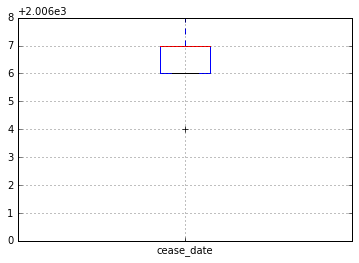

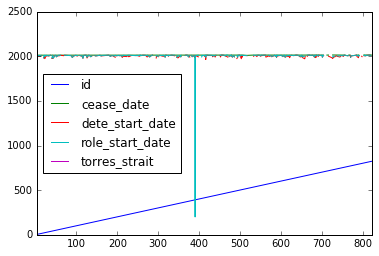

In [69]:
%matplotlib inline
dete_resignations.boxplot(column='cease_date')
dete_resignations.plot()

In [70]:
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

We have already found out about the Tafe survay. Lets create the same column for Dete as well

In [73]:
dete_resignations['institute_service']=dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In the last cell I have calculated the Years of service


In [74]:
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

###### Next, Based on the calculated years of service I am going to evaluate some other column to get better understanding of the reasons why exployee resigned.

There are couple of columns in both DataFrames which can help us to answer our question.

But before continuing we must analyze those columns and try to create a new column based on the values provided by employee in those specific columns.

In TAFE_SURVEY we will work with these columns:

#### 1- Contributing Factors. Dissatisfaction
#### 2- Contributing Factors. Job Dissatisfaction



In  Dete_survey:
###### 1-job_dissatisfaction
###### 2-dissatisfaction_with_the_department
###### 3-physical_work_environment
###### 4-lack_of_recognition
###### 5-lack_of_job_security
###### 6-work_location
###### 7-employment_conditions
###### 8-work_life_balance
###### 9-workload 



In [95]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [78]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [109]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True


In [118]:
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)

In [119]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


Here we have finished creating a column called Dissatisfies and next we will do the same for Dete Dataframe

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [121]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [122]:
dete_col=['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance','workload']

In [126]:
dete_resignations['dissatisfied']=dete_resignations[dete_col].any(axis=1,skipna=False)

In [127]:
dete_resignations['dissatisfied']

3      False
5       True
8      False
9       True
11     False
12     False
14      True
16      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
39      True
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
       ...  
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
770    False
771    False
774    False
784     True
786     True
788    False
789    False
790     True
791     True
794    False
797    False
798    False
802    False
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

In [142]:
dete_col_with_dissatissfied=['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance','workload','dissatisfied']

#### This is an over view of Dete Dataframe with Dissatisfied column

In [144]:
dete_resignations[dete_col_with_dissatissfied]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False,True
16,False,False,False,True,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False


In [145]:
dete_resignations['institute']='DETE'

In [146]:
tafe_resignations['institute']='TAFE'

In [150]:
len(tafe_resignations.columns)

25

In [151]:
len(dete_resignations.columns)

38

In [152]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

In [192]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [193]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

Here I have removed all the columns which the non-null values are less than 500

In [280]:
combined_update=combined.dropna(thresh=500 ,axis=1).copy()

In [281]:
combined_update['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [282]:
patt=r'Less than | year|More than|s'
combined_update['institute_service']=combined_update['institute_service'].astype('str').str.replace(patt,'').str.replace('-','.').str.split('.').str.get(0).astype('float')

I have created the regex to clean the Institute Service column in the cell above
Next I am going to categorize employee based on their service years:

### We'll use the slightly modified definitions below:

#### New: Less than 3 years at a company
#### Experienced: 3-6 years at a company
#### Established: 7-10 years at a company
#### Veteran: 11 or more years at a company


In [283]:
def career_stage(val):
    if val < 3:
        return 'New'
    elif 3<val<6:
        return 'Experienced'
    elif 7<val<10:
        return 'Established'
    elif val > 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan


        

In [284]:
combined_update['service_cat']=combined_update['institute_service'].apply(career_stage)

In [285]:
combined_update

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7.0,Teacher,Resignation-Other reasons,None
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3.0,Teacher,Resignation-Other reasons,None
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3.0,Teacher,Resignation-Move overseas/interstate,None
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14.0,Teacher,Resignation-Other reasons,Veteran
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5.0,Teacher,Resignation-Other employer,Experienced
7,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons,NaN
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30.0,Teacher,Resignation-Other employer,Veteran
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32.0,Cleaner,Resignation-Other reasons,Veteran


In [286]:
combined_update['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [287]:
combined_update['dissatisfied']=combined_update['dissatisfied'].fillna(False)

Here I filled the NaN cells with most appeared value in Dissatisfied column

In [300]:
combined_update['dissatisfied']

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
621    False
622    False
623     True
624    False
625    False
626    False
627    False
628     True
629     True
630    False
631    False
632    False
633    False
634    False
635    False
636    False
637    False
638     True
639    False
640    False
641     True
642    False
643    False
644    False
645    False
646    False
647    False
648    False
649    False
650    False
Name: dissatisfied, Length: 651, dtype: bool

In [315]:
df_for_plot=combined_update.pivot_table(index='service_cat', values='dissatisfied')

In [309]:
dissatissfied=combined_update[combined_update['dissatisfied']==True]

In [311]:
dissatissfied['service_cat'].value_counts(dropna=False)

NaN            82
Veteran        59
New            57
Experienced    26
Established    16
Name: service_cat, dtype: int64

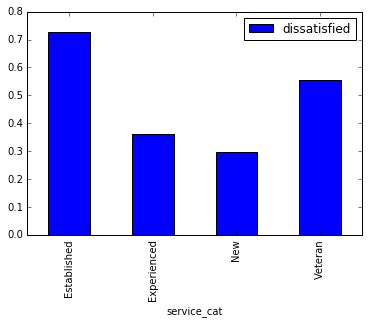

In [317]:
%matplotlib inline

df_for_plot.plot(kind='bar')